In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=False)

In [2]:
# impoting the database
from openpyxl import load_workbook
dataset = pd.read_excel('Database of the SC of UHPC joints.xlsx')

dataset.head()

,Jt,St,Nk,Bk,Hk,Dk,θk,Sk,hk,Dk/Hk,...,Ak/Aj,fc,Ft,ρf,lf,df,λf,σn,σn/fc,Vu
0,1,1,1,150,100,50.0,63.4,50,50,0.5,...,0.09375,149.0,2,2.0,22.5,0.25,1.833333,10.0,0.067114,1110.0
1,1,1,1,150,100,50.0,63.4,50,50,0.5,...,0.09375,149.0,2,2.0,22.5,0.25,1.833333,20.0,0.134228,1545.0
2,1,1,3,150,100,50.0,63.4,50,50,0.5,...,0.28125,148.0,2,2.0,22.5,0.25,1.833333,10.0,0.067568,1516.0
3,1,1,3,150,100,50.0,63.4,50,50,0.5,...,0.28125,148.0,2,2.0,22.5,0.25,1.833333,20.0,0.135135,2014.0
4,1,1,5,150,100,50.0,63.4,50,50,0.5,...,0.46875,148.0,2,2.0,22.5,0.25,1.833333,10.0,0.067568,2174.0


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.describe()

,Jt,St,Nk,Bk,Hk,Dk,θk,Sk,hk,Dk/Hk,Bj,Hj,Ak,Aj,Asm,Ak/Aj,fc,Ft,ρf,lf,df,λf,σn,σn/fc,Vu
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2.100917,1.334862,1.252294,99.128440,80.43578,29.071101,43.433576,14.105505,48.692661,0.270847,136.582569,328.669725,17254.128440,48256.422018,31002.293578,0.343952,153.606881,1.66055,1.988532,14.694954,0.215872,1.354175,6.684862,0.044543,742.643578
std,1.024537,0.473029,1.208884,71.072573,61.19334,22.933549,28.875316,23.368474,42.968878,0.200728,46.122908,178.696177,16612.099483,38419.607610,29501.004345,0.250484,25.926646,0.89772,0.533320,4.693345,0.053093,0.445125,6.307921,0.047247,586.697088
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,100.000000,0.000000,5000.000000,5000.000000,0.000000,71.400000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.200000
25%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,200.000000,0.000000,20000.000000,10000.000000,0.000000,127.075000,1.00000,2.000000,13.000000,0.200000,1.181818,2.000000,0.016434,334.000000
50%,2.000000,1.000000,1.000000,100.000000,100.00000,35.000000,54.500000,0.000000,50.000000,0.350000,120.000000,300.000000,15000.000000,42000.000000,20000.000000,0.333333,159.400000,1.00000,2.000000,13.000000,0.200000,1.300000,6.000000,0.034985,634.060000
75%,3.000000,2.000000,2.000000,150.000000,100.00000,50.000000,63.400000,47.500000,65.000000,0.500000,200.000000,320.000000,20000.000000,64000.000000,42000.000000,0.593750,175.525000,3.00000,2.000000,13.000000,0.220000,1.650000,9.000000,0.056662,877.950000
max,4.000000,2.000000,5.000000,200.000000,300.00000,100.000000,115.000000,80.000000,200.000000,0.600000,200.000000,800.000000,75000.000000,160000.000000,145000.000000,0.666667,193.100000,3.00000,3.000000,26.500000,0.380000,2.400000,30.000000,0.336134,3495.000000


In [4]:
corr_matrix = dataset.corr()

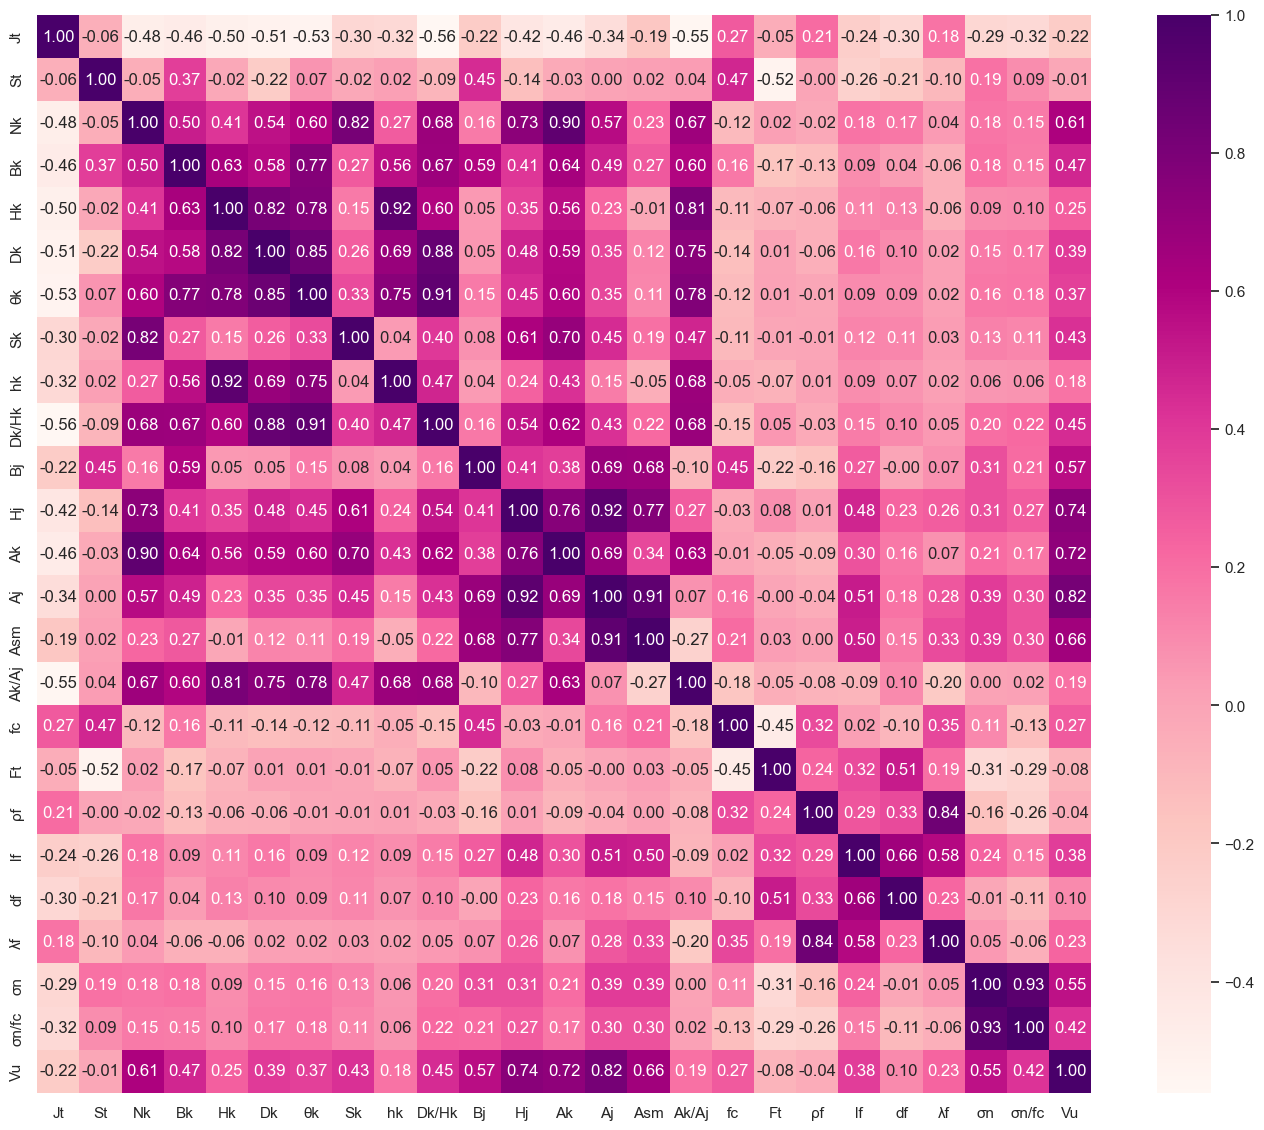

In [5]:
plt.figure(figsize=(17,14))
sns.heatmap(corr_matrix,
           cmap='RdPu',
           annot=True,
           fmt='.2f')
plt.show()

In [6]:
threshold = 0.8

highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

selected_features = set()
for feature_pair in highly_correlated_features:
    selected_features.add(feature_pair[0])
    selected_features.add(feature_pair[1])

print("Selected Features:", selected_features)

Selected Features: {'λf', 'σn/fc', 'Hk', 'Asm', 'Ak/Aj', 'Hj', 'Dk/Hk', 'Aj', 'Nk', 'hk', 'σn', 'Sk', 'ρf', 'Vu', 'Ak', 'Dk', 'θk'}
